# LSTM과 CNN을 조합해 영화 리뷰 분류하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test)=imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 2s 0us/step


In [6]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [7]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [11]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [12]:
history=model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 114s 238ms/step - loss: 0.4130 - accuracy: 0.7962 - val_loss: 0.3681 - val_accuracy: 0.8301
Epoch 2/100
469/469 [==============================] - 120s 255ms/step - loss: 0.2420 - accuracy: 0.9051 - val_loss: 0.2733 - val_accuracy: 0.8835
Epoch 3/100
469/469 [==============================] - 123s 262ms/step - loss: 0.1879 - accuracy: 0.9307 - val_loss: 0.2656 - val_accuracy: 0.8902
Epoch 4/100
469/469 [==============================] - 123s 262ms/step - loss: 0.1492 - accuracy: 0.9457 - val_loss: 0.2850 - val_accuracy: 0.8909
Epoch 5/100
469/469 [==============================] - 122s 261ms/step - loss: 0.1272 - accuracy: 0.9532 - val_loss: 0.2985 - val_accuracy: 0.8872
Epoch 6/100
469/469 [==============================] - 179s 382ms/step - loss: 0.0936 - accuracy: 0.9690 - val_loss: 0.3750 - val_accuracy: 0.8835


In [13]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 34s 43ms/step - loss: 0.3952 - accuracy: 0.8760

 Test Accuracy: 0.8760


In [14]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

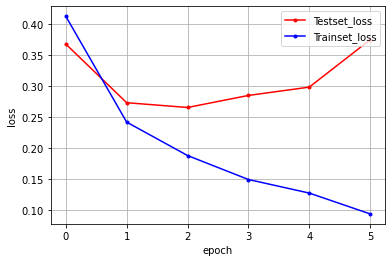

In [17]:
#그래프
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()